# Import  

In [107]:
# Data manipulation
import pandas as pd
import numpy as np

# Options for pandas
pd.set_option('max_colwidth', 200)
pd.set_option('display.width', 400)
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 30)

# Display
from IPython.display import display, HTML, Image
display(HTML("<style>.container { width:85% !important; }</style>"))
import warnings
warnings.filterwarnings('ignore')

# Visualizations

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# NN
import torch
import torch.utils.data as data
from sklearn.model_selection import train_test_split
import torch.utils.data as data
import torchvision
from torchvision import transforms

from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout
from keras.optimizers import RMSprop

In [85]:
df_train = pd.read_csv(r'data/hw6/train.csv')
df_valid = pd.read_csv(r'data/hw6/test.csv')

In [86]:
display(df_train.head(),
        df_train.tail())

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,...,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,...,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
41995,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
41999,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# EDA & Preprocessing

In [87]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [88]:
df_train.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,...,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.00000,42000.000000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.0,42000.0,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00300,0.011190,0.005143,0.000214,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.006143,0.035833,0.082357,0.114905,0.178714,0.301452,0.413643,0.513667,0.558833,0.677857,0.60281,0.489238,0.340214,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.56812,1.626927,1.053972,0.043916,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.949803,2.350859,3.934280,4.543583,5.856772,7.219742,8.928286,10.004069,10.129595,11.254931,10.69603,9.480066,7.950251,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,116.00000,254.000000,216.000000,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,177.000000,231.000000,253.000000,254.000000,254.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.00000,255.000000,255.000000,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


In [89]:
df_train = df_train.astype('int8')

In [90]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int8(785)
memory usage: 31.4 MB


In [91]:
len(df_train), len(df_valid)

(42000, 28000)

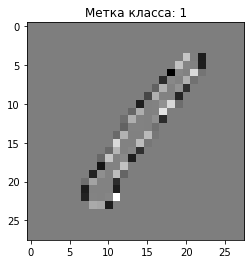

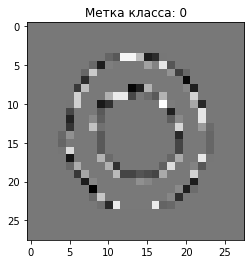

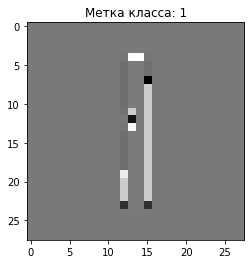

In [92]:
for i in range(3):
    plt.imshow(np.reshape(np.array(df_train.iloc[i,1:]), (-1,28)), cmap = 'binary')
    plt.title(f'Метка класса: {df_train.iloc[i, 0]}')
    plt.show()

In [94]:
labels = df_train['label']
features = df_train.drop('label', axis=1)
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.3, random_state=42)

In [95]:
X_train /= 255 #приведем к интервалу 0-1
X_test /= 255
df_valid /=255

In [96]:
print(X_train.shape)
print(y_train.shape)

(29400, 784)
(29400,)


In [97]:
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()
df_valid = df_valid.to_numpy()

In [98]:
X_train = X_train.reshape(X_train.shape[0], * (28, 28, 1))
X_test = X_test.reshape(X_test.shape[0], * (28, 28, 1))
df_valid = df_valid.reshape(df_valid.shape[0], * (28, 28, 1))

In [99]:
print(X_train.shape)
print(X_test.shape)
print(df_valid.shape)

(29400, 28, 28, 1)
(12600, 28, 28, 1)
(28000, 28, 28, 1)


In [101]:
y_train.head()

15673    4
2388     0
40301    9
5556     9
31093    1
Name: label, dtype: int8

In [102]:
y_train = pd.get_dummies(y_train, columns='label') # сделаем результат полегче для восприятия модельки
y_test = pd.get_dummies(y_test, columns='label')
y_train.head()

,0,1,2,3,4,5,6,7,8,9
15673,0,0,0,0,1,0,0,0,0,0
2388,1,0,0,0,0,0,0,0,0,0
40301,0,0,0,0,0,0,0,0,0,1
5556,0,0,0,0,0,0,0,0,0,1
31093,0,1,0,0,0,0,0,0,0,0


In [103]:
def numbers_model():
    model = Sequential()
    model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', input_shape = (28, 28, 1)))
    model.add(Conv2D(128, (3,3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.4))
    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.4))
    model.add(Dense(10, activation='softmax'))
    model.compile(optimizer=RMSprop(lr=0.01), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [109]:
%%time

model = numbers_model()
history = model.fit(X_train, y_train, epochs=15, batch_size=500, validation_data=(X_test, y_test))

Epoch 1/15
59/59 [==============================] - 92s 2s/step - loss: 2.8176 - accuracy: 0.5870 - val_loss: 0.4211 - val_accuracy: 0.8685
Epoch 2/15
59/59 [==============================] - 92s 2s/step - loss: 0.4246 - accuracy: 0.8687 - val_loss: 0.1883 - val_accuracy: 0.9394
Epoch 3/15
59/59 [==============================] - 92s 2s/step - loss: 0.2293 - accuracy: 0.9309 - val_loss: 0.1454 - val_accuracy: 0.9546
Epoch 4/15
59/59 [==============================] - 88s 2s/step - loss: 0.1640 - accuracy: 0.9498 - val_loss: 0.1122 - val_accuracy: 0.9655
Epoch 5/15
59/59 [==============================] - 92s 2s/step - loss: 0.1237 - accuracy: 0.9623 - val_loss: 0.1118 - val_accuracy: 0.9677
Epoch 6/15
59/59 [==============================] - 88s 2s/step - loss: 0.1118 - accuracy: 0.9649 - val_loss: 0.1151 - val_accuracy: 0.9657
Epoch 7/15
59/59 [==============================] - 88s 1s/step - loss: 0.0877 - accuracy: 0.9728 - val_loss: 0.1014 - val_accuracy: 0.9713
Epoch 8/15
59/59 [==

Text(0.5, 1.0, 'Loss ')

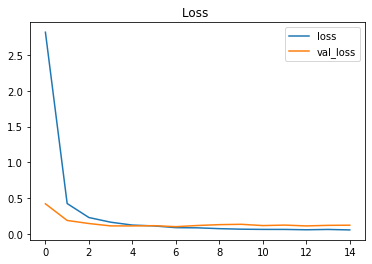

In [110]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.title('Loss ')

Text(0.5, 1.0, 'Accuracy')

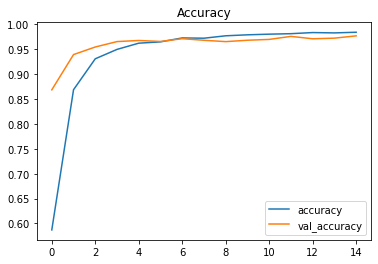

In [111]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.title('Accuracy')

In [112]:
score = model.evaluate(X_test, y_test)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

394/394 [==============================] - 19s 49ms/step - loss: 0.1221 - accuracy: 0.9770
Test loss: 0.12209048122167587
Test accuracy: 0.9769841432571411


In [113]:
prediction = model.predict(df_valid)

875/875 [==============================] - 43s 49ms/step


In [114]:
prediction = np.argmax(prediction, axis=1) 

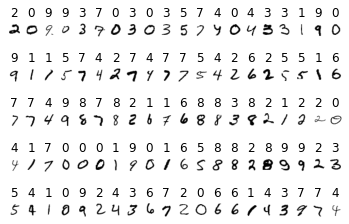

In [115]:
L = 5
W = 20
fig, axes = plt.subplots(L, W)
axes = axes.ravel()

for i in np.arange(0, L * W):  
    axes[i].imshow(df_valid[i].reshape(28,28), cmap = 'binary')
    axes[i].set_title(f"{int(prediction[i])}")
    axes[i].axis('off')

plt.subplots_adjust()